## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#from src
from src.dataprep import prep_df

#SMOTE
from imblearn.over_sampling import SMOTE

## Model Prep

In [2]:
df = prep_df()

X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)

smote = SMOTE()
X_train_s, y_train_s = smote.fit_sample(X_train, y_train)

## Final Model

In [4]:
rf = RandomForestClassifier(n_estimators=255, max_depth=10, max_features=5, random_state = 7)

rf.fit(X_train_s, y_train_s)
train_pred = rf.predict(X_train_s)
print("Recall:")
print("Train:")
print(recall_score(train_pred, y_train_s))
val_pred = rf.predict(X_test)
print("Test:")
print(recall_score(val_pred, y_test))
print(" ")
print("Accuracy:")
print("Train:")
print(rf.score(X_train_s, y_train_s))
print("Test:")
print(rf.score(X_test, y_test))

Recall:
Train:
0.8523562472978815
Test:
0.5691699604743083
 
Accuracy:
Train:
0.8931500241196334
Test:
0.7725657427149965


[[799 218]
 [102 288]]


<AxesSubplot:>

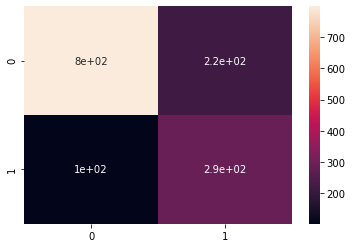

In [5]:
y_hat = rf.predict(X_test)
cf_mat = confusion_matrix(y_test, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

I had originaly considered false negatives (incorrectly assessing a staying customer as one who will churn out) was the problem. It is nice that that number has improved, but now there are 